In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False
from mpl_toolkits import mplot3d

In [2]:
# 加载训练数据集
# tds = np.loadtxt('dataset_一元线性回归.csv', delimiter=',', dtype='int', skiprows=1)
# tds_x = tds[:,0]
# tds_y = tds[:,1]
# tds_x_mean = tds_x.mean()
# tds_x_std = tds_x.std()

def g(x):
    return 0.1 * (x**3 + x ** 2 + x)

# 随意准备一些向真正的函数加入了一点噪声的训练数据
tds_x = np.linspace(-2, 2, 20)
tds_y = (g(tds_x) + np.random.randn(tds_x.size) * 0.1) * 10000


In [3]:

# 标准化
std_tds_x = (tds_x - tds_x.mean()) / tds_x.std()

def to_matrix(v, n):
    tmp = [np.ones(v.shape[0])]
    for i in range(1, n+1):
        tmp.append(v ** i)
    return np.vstack(tmp).T

n = 6
train_x = to_matrix(std_tds_x, n)
train_x

array([[ 1.00000000e+00, -1.64750894e+00,  2.71428571e+00,
        -4.47180999e+00,  7.36734694e+00, -1.21377700e+01,
         1.99970845e+01],
       [ 1.00000000e+00, -1.47408695e+00,  2.17293233e+00,
        -3.20309119e+00,  4.72163491e+00, -6.96010040e+00,
         1.02597932e+01],
       [ 1.00000000e+00, -1.30066495e+00,  1.69172932e+00,
        -2.20037304e+00,  2.86194810e+00, -3.72243560e+00,
         4.84164153e+00],
       [ 1.00000000e+00, -1.12724296e+00,  1.27067669e+00,
        -1.43236136e+00,  1.61461925e+00, -1.82006819e+00,
         2.05165905e+00],
       [ 1.00000000e+00, -9.53820966e-01,  9.09774436e-01,
        -8.67761932e-01,  8.27689525e-01, -7.89467622e-01,
         7.53010770e-01],
       [ 1.00000000e+00, -7.80398973e-01,  6.09022556e-01,
        -4.75280577e-01,  3.70908474e-01, -2.89456592e-01,
         2.25891627e-01],
       [ 1.00000000e+00, -6.06976979e-01,  3.68421053e-01,
        -2.23623097e-01,  1.35734072e-01, -8.23874569e-02,
         5.0007289

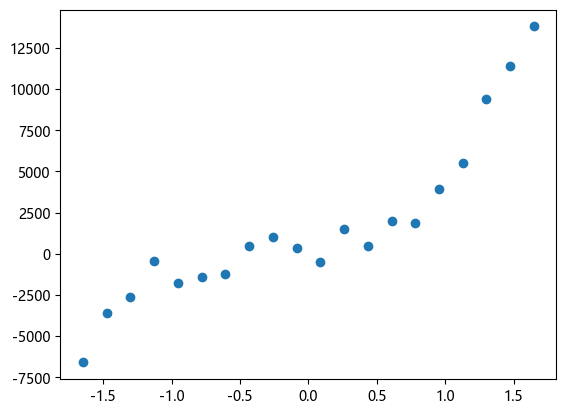

In [4]:
# 使用训练数据集绘制散点图看数据分布
plt.scatter(std_tds_x, tds_y)

In [5]:
# 拟合曲线函数
def f(theta, x):
    return np.dot(x, theta)

# 成本函数
def J(theta, train_x, tds_y):
    m = len(train_x)
    return np.sum(np.power(f(theta, train_x) - tds_y, 2)) / 2 / m

LAMBDA = 0.5
# 成本函数
def J2(theta, train_x, tds_y):
    m = len(train_x)
    return np.sum(np.power(f(theta, train_x) - tds_y, 2)) / 2 / m + LAMBDA / m * np.sum(np.power(theta, 2))

# 下面两个是偏导数
def pd_theta(theta, train_x, tds_y):
    m = len(train_x)
    return np.dot((f(theta, train_x) - tds_y), train_x) / m

[  579.25523287   857.92439921 -1762.55759059  2022.98749492
  3561.88124637   -21.30344707  -925.00592512] [ 239.4832409  1262.73746457  650.38781037 1310.06231556 1130.57237506
  200.54562036 -325.691088  ]


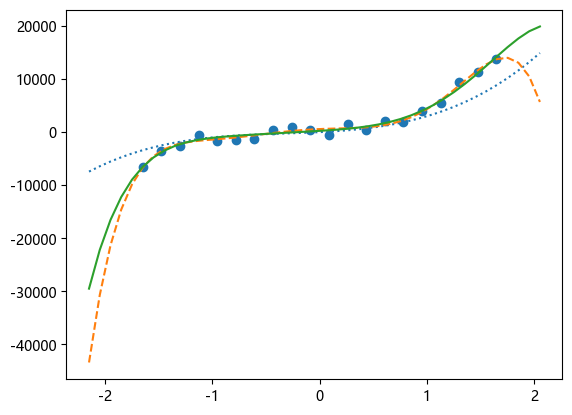

In [6]:
eta = 1e-3
diff = 1e-5
theta = np.random.randn(n+1)
lst_cost = []
j_cost_cur = J(theta, train_x, tds_y)
i = 0
while True:
    j_cost_pre = j_cost_cur
    tmp_theta = theta - eta * pd_theta(theta, train_x, tds_y)
    
    theta = tmp_theta
    
    j_cost_cur = J(theta, train_x, tds_y)
    
    lst_cost.append(j_cost_cur)
    
    # print(i, theta, lst_cost[i])
    
    
    if j_cost_pre - j_cost_cur < diff:
        break
theta1 = theta


m = len(train_x)
theta = np.random.randn(n+1)
lst_cost2 = []
j_cost_cur = J2(theta, train_x, tds_y)
while True:
    j_cost_pre = j_cost_cur
    reg_term = LAMBDA * np.hstack([0, theta[1:]]) / m  # b不参与正则化
    tmp_theta = theta - eta * (pd_theta(theta, train_x, tds_y) + reg_term)
    
    theta = tmp_theta
    
    j_cost_cur = J2(theta, train_x, tds_y)
    
    lst_cost2.append(j_cost_cur)
    
    # print(i, theta, lst_cost[i])
    
    
    if j_cost_pre - j_cost_cur < diff:
        break
theta2 = theta

print(theta1, theta2)

plt.scatter(std_tds_x, tds_y)
x = np.arange(np.min(std_tds_x) - 0.5, np.max(std_tds_x) + 0.5, 0.1)
y0 = g(x) * 10000
plt.plot(x, y0, linestyle='dotted')
y1 = f(theta1, to_matrix(x, n))
plt.plot(x, y1, linestyle='dashed')
y2 = f(theta2, to_matrix(x, n))
plt.plot(x, y2)